<a href="https://colab.research.google.com/github/Gauri-01/Gauri-Pachupate/blob/main/RemoveBgImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment 📝:
# Create a Python script to remove the background from an uploaded image, specifically focusing on accurately isolating a person.


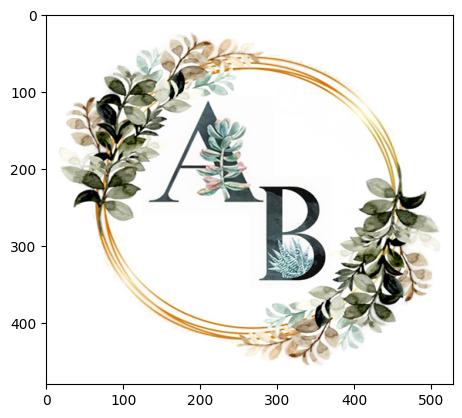

In [35]:
import cv2

def remove_background_opencv(image_path, threshold=30):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([0, 100, 80])
    upper_blue = np.array([10, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    fg_object = image.copy()
    cv2.fillPoly(fg_object, contours, [0, 0, 0])

    cv2.imwrite("output_mask.png", mask)
    cv2.imwrite("output_foreground.png", fg_object)

    return mask, fg_object

mask, fg_object = remove_background_opencv("/content/nameLogo.png")
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/content/nameLogo.png")
plt.imshow(img)
plt.show()

